# Exploratory data Analysis

## Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind, chi2_contingency
# import ace_tools_open as tools
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [ ]:
file_path = 'Laminitis.xlsx'
# Step 1: Reload the data, treating the first two rows as headers
df_raw = pd.read_excel(file_path)

# Step 2: Flatten the multi-level column headers
df_raw.columns = [' '.join([str(i) for i in col if str(i) != 'nan']).strip() for col in df_raw.columns]

# Step 3: Display the cleaned header and first few rows
df_cleaned = df_raw.copy()
# Assuming your DataFrame is called df
df_cleaned.columns = df_cleaned.columns.str.strip()  # Remove leading/trailing spaces
df_cleaned.columns = df_cleaned.columns.str.replace(' ', '')  # Replace spaces with underscores

# Drop last 3 rows/Drop rows with more than 90% missing values
# df_cleaned.drop([21,27,28,30],inplace=True)
df_cleaned = df_cleaned[df_cleaned.isnull().mean(axis=1) < 0.9]

#df_cleaned = df_cleaned.iloc[22,28,29,31,48,49,50]
df_cleaned.shape

(47, 41)

In [ ]:
df_cleaned.head()

,Horse#,HVMS#,Dateofstudy(mm/dd/yy),Dateofbirth(mm/dd/yy),Age(years),Sex,HeartRate,Respiratoryrate,Rectaltemperature,Gutsounds,...,LLRF,LLLF,LLRH,LLLH,Sedation(xylazine-mL),Photo4feet,Xray4feet,Bloodcollection,IncludedinStudy,additionalcomments
0,1,95987.0,2021-02-23,2018-01-23,3,Female,40.0,16.0,37.3,WNL,...,-,-,+,-,1.0,ok,ok,ok,yes,NaN
1,2,92903.0,2021-03-01,2003-01-17,18,Female,40.0,16.0,36.5,WNL,...,+,-,+,-,1.5,ok,ok,ok,yes,DFTS effusion bilat HL
2,3,92091.0,2021-03-01,2012-11-12,8,Female,32.0,12.0,37.6,WNL,...,-,-,-,-,1.0,ok,ok,ok,yes,"packing in both front feet + shod both fore, t..."
3,4,92137.0,2021-03-01,2008-01-02,13,Female,40.0,16.0,37.6,WNL,...,-,+,-,+,1.5,ok,ok,ok,excluded,"Shod both fronts, vv contracted heel RF + sunk..."
4,5,92335.0,2021-03-02,2007-10-11,13,Female,40.0,32.0,37.6,WNL,...,-,NaN,-,-,3.0,ok,ok,ok,yes,"Rads LF + RF taken with hind marker, corrected..."


## Drop the columns which is not contributing much

In [ ]:
df_cleaned.drop(columns=['Horse#', 'HVMS#', 'Dateofstudy(mm/dd/yy)', 'Dateofbirth(mm/dd/yy)',
                         'Girth(cm)', 'Flank(cm)', 'Photo4feet', 'Xray4feet', 'Bloodcollection',
                         'IncludedinStudy', 'additionalcomments','LLRF','LLLF','LLRH','LLLH','Sedation(xylazine-mL)'], inplace=True)

### Check for the unique values in the columns so we can convert it into numerical values

In [ ]:
# # Step 1: Extract relevant columns to inspect their unique values
# columns_to_check = [
#     'Sex',
#     'LLRF',
#     'LLLF',
#     'LLRH',
#     'LLLH'
# ]

# # Get unique values from ea?ch column to understand how to convert them to numeric
# unique_values = {col: df_cleaned[col].unique() for col in columns_to_check}
# unique_values

### Convert categorical values into numerical values

In [ ]:
df_cleaned['Sex'] = df_cleaned['Sex'].map({
    'Female': 0,
    # 'Stallion': 1,
    'Gelding': 1
})

In [ ]:
df_cleaned.head()

,Age(years),Sex,HeartRate,Respiratoryrate,Rectaltemperature,Gutsounds,Column1,Bodyweight(kg),BodyConditionScoring(outof9),LengthRF,...,WidthRH,WidthLH,HTRF,HTLF,HTRH,HTLH,LERF,LELF,LERH,LELH
0,3,0.0,40.0,16.0,37.3,WNL,WNL,430.0,8.0,13.0,...,9.5,10.0,-,-,-,-,3.0,0.0,0.0,0.0
1,18,0.0,40.0,16.0,36.5,WNL,WNL,480.0,5.0,13.5,...,11.0,10.5,+,+,+,+,0.0,0.0,0.0,0.0
2,8,0.0,32.0,12.0,37.6,WNL,WNL,477.0,7.0,13.0,...,10.5,11.0,packing,packing,-,-,0.0,0.0,0.0,0.0
3,13,0.0,40.0,16.0,37.6,WNL,WNL,500.0,6.0,14.5,...,10.0,10.0,+,++,+,-,0.0,3.0,0.0,3.0
4,13,0.0,40.0,32.0,37.6,WNL,WNL,400.0,6.0,13.5,...,10.0,10.0,-,+,+,+,0.0,0.0,0.0,0.0


'+' (Plus): Indicates the presence of lameness in that specific leg.

'-' (Minus): Indicates the absence of lameness in that specific leg.

**'+' = 1, '++' = 1, '-' = 0, 'packing' = 0, 'toe+' = 1**

In [ ]:
# Encode LL columns
# ll_cols = [
#     'LLRF',
#     'LLLF',
#     'LLRH',
#     'LLLH'
# ]
# for col in ll_cols:
#     df_cleaned[col] = df_cleaned[col].map({'+': 1, '-': 0})
#     df_cleaned[col] = df_cleaned[col].fillna(0)

# Encode Hoof Testers (HT) columns
ht_cols = [
    'HTRF',
    'HTLF',
    'HTRH',
    'HTLH'
]
for col in ht_cols:
    df_cleaned[col] = df_cleaned[col].map({'+': 1, '-': 0, '++': 1, 'toe+':1,'packing':0})
    df_cleaned[col] = df_cleaned[col].fillna(0)

Gut_cols = [
    'Gutsounds'
]
for col in Gut_cols:
    df_cleaned[col] = df_cleaned[col].map({'WNL': 1, 'decrease': 0})
    df_cleaned[col] = df_cleaned[col].fillna(0)

# Compute lameness score and risk level
df_cleaned['lameness_score'] = df_cleaned[[col for col in ht_cols]].sum(axis=1)
#print(df_cleaned['lameness_score'] )
# Map score to risk level: Low if score is 0, High if score is 1 or more
def map_score_to_risk(score):
    if score < 1 :
        return 'Low'
    else:
        return 'High'

df_cleaned['lameness_risk_level'] = df_cleaned['lameness_score'].apply(map_score_to_risk)

# Encode target labels (Low = 0, High = 1)
cat = pd.Categorical(df_cleaned['lameness_risk_level'].str.strip().str.title(),
                     categories=['Low', 'High'], ordered=True)
df_cleaned['lameness_risk_label'] = cat.codes   # Low=0, High=1, others=-1

# label_encoder = LabelEncoder()
# df_cleaned['lameness_risk_label'] = label_encoder.fit_transform(df_cleaned['lameness_risk_level'])

In [ ]:
df_cleaned.head()

,Age(years),Sex,HeartRate,Respiratoryrate,Rectaltemperature,Gutsounds,Column1,Bodyweight(kg),BodyConditionScoring(outof9),LengthRF,...,HTLF,HTRH,HTLH,LERF,LELF,LERH,LELH,lameness_score,lameness_risk_level,lameness_risk_label
0,3,0.0,40.0,16.0,37.3,1.0,WNL,430.0,8.0,13.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,Low,0
1,18,0.0,40.0,16.0,36.5,1.0,WNL,480.0,5.0,13.5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,High,1
2,8,0.0,32.0,12.0,37.6,1.0,WNL,477.0,7.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,0
3,13,0.0,40.0,16.0,37.6,1.0,WNL,500.0,6.0,14.5,...,1.0,1.0,0.0,0.0,3.0,0.0,3.0,3.0,High,1
4,13,0.0,40.0,32.0,37.6,1.0,WNL,400.0,6.0,13.5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,High,1


In [ ]:
df_cleaned = df_cleaned.rename(columns={'Bodyweight(kg)':'Bodyweight','BodyConditionScoring(outof9)':'BodyConditionScoring','Column1':'Digitalpulses'})

In [ ]:
## Converting digital pulses into numerical values
df_cleaned['Digitalpulses'].replace(['WNL', 'increased front feet', 'increased', 'increased hinds',
       'RF slightly increased', 'increased RF', 'increased fronts'], [0, 1, 2, 3, 4, 5, 6], inplace=True)

In [ ]:
print(df_cleaned.shape)
df_cleaned.head()

(47, 28)


,Age(years),Sex,HeartRate,Respiratoryrate,Rectaltemperature,Gutsounds,Digitalpulses,Bodyweight,BodyConditionScoring,LengthRF,...,HTLF,HTRH,HTLH,LERF,LELF,LERH,LELH,lameness_score,lameness_risk_level,lameness_risk_label
0,3,0.0,40.0,16.0,37.3,1.0,0.0,430.0,8.0,13.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,Low,0
1,18,0.0,40.0,16.0,36.5,1.0,0.0,480.0,5.0,13.5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,High,1
2,8,0.0,32.0,12.0,37.6,1.0,0.0,477.0,7.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,0
3,13,0.0,40.0,16.0,37.6,1.0,0.0,500.0,6.0,14.5,...,1.0,1.0,0.0,0.0,3.0,0.0,3.0,3.0,High,1
4,13,0.0,40.0,32.0,37.6,1.0,0.0,400.0,6.0,13.5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,High,1


# Feature Engineering

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
df = df_cleaned
df.head()

,Age(years),Sex,HeartRate,Respiratoryrate,Rectaltemperature,Gutsounds,Digitalpulses,Bodyweight,BodyConditionScoring,LengthRF,...,HTLF,HTRH,HTLH,LERF,LELF,LERH,LELH,lameness_score,lameness_risk_level,lameness_risk_label
0,3,0.0,40.0,16.0,37.3,1.0,0.0,430.0,8.0,13.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,Low,0
1,18,0.0,40.0,16.0,36.5,1.0,0.0,480.0,5.0,13.5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,High,1
2,8,0.0,32.0,12.0,37.6,1.0,0.0,477.0,7.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,0
3,13,0.0,40.0,16.0,37.6,1.0,0.0,500.0,6.0,14.5,...,1.0,1.0,0.0,0.0,3.0,0.0,3.0,3.0,High,1
4,13,0.0,40.0,32.0,37.6,1.0,0.0,400.0,6.0,13.5,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,High,1


### Fill the missing values with median

In [ ]:
df = df[['Age(years)','HeartRate', 'Respiratoryrate', 'Rectaltemperature', 'Gutsounds',
          'Digitalpulses', 'Bodyweight', 'BodyConditionScoring',
         'LengthLH',
         'WidthRF', 'WidthLF',
         'LERF', 'LELF', 'LERH','LELH',
         'lameness_risk_label']]

# Impute missing numerical values with median
# num_cols = df.select_dtypes(include=[np.number]).columns
# df[num_cols] = df[num_cols].fillna(df[num_cols].median())
# df.shape
num_cols = df.select_dtypes(include='number').columns.drop('label', errors='ignore')
df[num_cols] = df[num_cols].apply(lambda s: s.fillna(s.median()))
df.shape

(47, 16)

In [ ]:
df.isna().value_counts().sum()

np.int64(47)

# Logistic Regression for Risk score

In [ ]:
features = ['Age(years)','HeartRate', 'Respiratoryrate', 'Rectaltemperature', 'Gutsounds',
  'Digitalpulses', 'Bodyweight', 'BodyConditionScoring',
 'LengthLH', 'WidthRF', 'WidthLF', 'LERF', 'LELF', 'LERH', 'LELH']

#  df = df[['Age(years)','HeartRate', 'Respiratoryrate', 'Rectaltemperature', 'Gutsounds',
#           'Digitalpulses', 'Bodyweight', 'BodyConditionScoring',
#          'LengthLH',
#          'WidthRF', 'WidthLF',
#          'LERF', 'LELF', 'LERH','LELH',
#          'lameness_risk_label']]

target = 'lameness_risk_label'
x = df[features]
y = df[target]
x.shape, y.shape
# # Adding constant term
# # Using Binomial distribution and logit function as link function which is default for Binomial family
# model_logistic = sm.GLM(y,(sm.add_constant(x)), family = sm.families.Binomial())
# res_logistic=model_logistic.fit()
# res_logistic.summary()

((47, 15), (47,))

# Machine Learning Models

In [ ]:
features

['Age(years)',
 'HeartRate',
 'Respiratoryrate',
 'Rectaltemperature',
 'Gutsounds',
 'Digitalpulses',
 'Bodyweight',
 'BodyConditionScoring',
 'LengthLH',
 'WidthRF',
 'WidthLF',
 'LERF',
 'LELF',
 'LERH',
 'LELH']

## Training and Testing

## Saving the model

In [ ]:
# import joblib
# save_path = ""
# joblib.dump(voting_clf, os.path.join(save_path, "voting_model.pkl"))
# joblib.dump(scaler, os.path.join(save_path, "scaler.pkl"))
# joblib.dump(selector, os.path.join(save_path, "feature_selector.pkl"))

# # Load pipeline
# loaded_scaler = joblib.load(os.path.join(save_path, "scaler.pkl"))
# loaded_selector = joblib.load(os.path.join(save_path, "feature_selector.pkl"))
# loaded_model = joblib.load(os.path.join(save_path, "voting_model.pkl"))

# y_pred = loaded_model.predict(X_test_sel)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# 2 September

In [ ]:
X = df[features].copy()
y = df[target].copy()
print("Counts of 0 and 1 in y:")
print(y.value_counts())

Counts of 0 and 1 in y:
lameness_risk_label
1    37
0    10
Name: count, dtype: int64


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tabpfn import TabPFNClassifier

# ==== CONFIG ====
k_folds = 5
k_features = min(6, X.shape[1])
mean_fpr = np.linspace(0, 1, 100)

# ==== MODELS ====
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "TabularPFN": TabPFNClassifier()
}

results = {name: [] for name in models}
results["ANN"] = []
roc_curves = {name: [] for name in models}
roc_curves["ANN"] = []
conf_matrices = {name: np.array([[0, 0], [0, 0]]) for name in models}
conf_matrices["ANN"] = np.array([[0, 0], [0, 0]])

# ==== GLOBAL FEATURE SELECTION ====
scaler_global = MinMaxScaler()
X_scaled_global = scaler_global.fit_transform(X)

selector = SelectKBest(score_func=chi2, k=k_features)
X_selected = selector.fit_transform(X_scaled_global, y)
selected_features = X.columns[selector.get_support()].tolist()
print("✅ Selected Features (Once):", selected_features)

X_df_selected = pd.DataFrame(X_selected, columns=selected_features)

# ==== K-FOLD ====
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X_df_selected, y), 1):
    print(f"\n📂 Fold {fold}/{k_folds}")

    X_train, X_test = X_df_selected.iloc[train_idx], X_df_selected.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # ==== SMOTE ====
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # ==== SCALE ====
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ==== ML MODELS ====
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]

        acc = accuracy_score(y_test, y_pred) * 100
        prec = precision_score(y_test, y_pred, zero_division=0) * 100
        rec = recall_score(y_test, y_pred, zero_division=0) * 100
        f1 = f1_score(y_test, y_pred, zero_division=0) * 100
        roc = roc_auc_score(y_test, y_proba)

        results[name].append({
            "Accuracy": acc, "Precision": prec,
            "Recall": rec, "F1 Score": f1, "ROC AUC": roc
        })

        print(f"📊 {name} - Acc: {acc:.2f}, Prec: {prec:.2f}, Rec: {rec:.2f}, F1: {f1:.2f}, AUC: {roc:.4f}")

        # ROC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        roc_curves[name].append(interp_tpr)

        # Confusion Matrix (accumulate)
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices[name] += cm

    # ==== ANN ====
    ann = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ann.fit(X_train_scaled, y_train, epochs=50, batch_size=4, verbose=0,
            validation_split=0.2, callbacks=[early_stop])

    y_proba_ann = ann.predict(X_test_scaled).ravel()
    y_pred_ann = (y_proba_ann > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred_ann) * 100
    prec = precision_score(y_test, y_pred_ann, zero_division=0) * 100
    rec = recall_score(y_test, y_pred_ann, zero_division=0) * 100
    f1 = f1_score(y_test, y_pred_ann, zero_division=0) * 100
    roc = roc_auc_score(y_test, y_proba_ann)

    results["ANN"].append({
        "Accuracy": acc, "Precision": prec,
        "Recall": rec, "F1 Score": f1, "ROC AUC": roc
    })

    print(f"📊 ANN - Acc: {acc:.2f}, Prec: {prec:.2f}, Rec: {rec:.2f}, F1: {f1:.2f}, AUC: {roc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba_ann)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    roc_curves["ANN"].append(interp_tpr)

    cm = confusion_matrix(y_test, y_pred_ann)
    conf_matrices["ANN"] += cm

# ==== AVERAGE METRICS ====
final_results = []
for name, scores in results.items():
    df = pd.DataFrame(scores)
    avg = df.mean().to_dict()
    avg["Model"] = name
    final_results.append(avg)

results_df = pd.DataFrame(final_results).round(2).sort_values(by="F1 Score", ascending=False)

✅ Selected Features (Once): ['Digitalpulses', 'WidthRF', 'LERF', 'LELF', 'LERH', 'LELH']

📂 Fold 1/5
📊 Random Forest - Acc: 80.00, Prec: 100.00, Rec: 75.00, F1: 85.71, AUC: 0.8438
📊 Logistic Regression - Acc: 70.00, Prec: 100.00, Rec: 62.50, F1: 76.92, AUC: 0.9688
📊 KNN - Acc: 80.00, Prec: 100.00, Rec: 75.00, F1: 85.71, AUC: 0.8750
📊 SVM - Acc: 80.00, Prec: 100.00, Rec: 75.00, F1: 85.71, AUC: 0.9688
📊 XGBoost - Acc: 70.00, Prec: 100.00, Rec: 62.50, F1: 76.92, AUC: 0.7188
📊 Decision Tree - Acc: 80.00, Prec: 100.00, Rec: 75.00, F1: 85.71, AUC: 0.8125
📊 Gradient Boosting - Acc: 70.00, Prec: 100.00, Rec: 62.50, F1: 76.92, AUC: 0.7812
📊 TabularPFN - Acc: 90.00, Prec: 100.00, Rec: 87.50, F1: 93.33, AUC: 0.8750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
📊 ANN - Acc: 40.00, Prec: 100.00, Rec: 25.00, F1: 40.00, AUC: 0.5312

📂 Fold 2/5
📊 Random Forest - Acc: 70.00, Prec: 85.71, Rec: 75.00, F1: 80.00, AUC: 0.5625
📊 Logistic Regression - Acc: 40.00, Prec: 75.00, Rec: 37.50, F1: 50.00, AUC: 0.5312
📊 KNN


📊 Average Confusion Matrices (summed across folds):


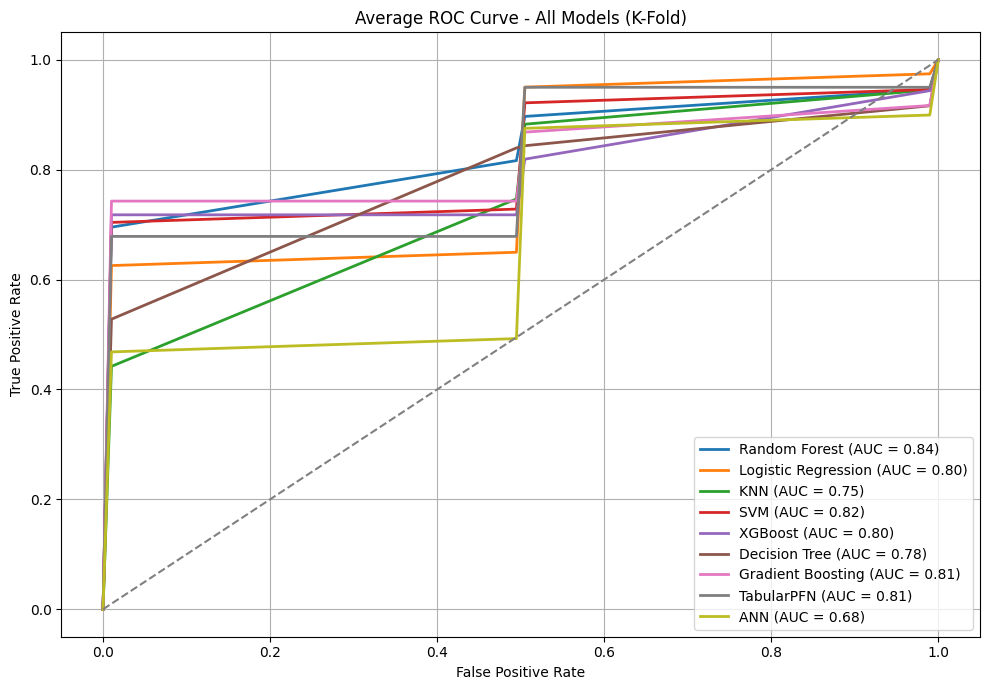


📊 Final K-Fold Averaged Comparison:
 Accuracy  Precision  Recall  F1 Score  ROC AUC               Model
    85.56      94.64   87.14     90.27     0.84       Random Forest
    83.33      94.29   84.29     88.75     0.78       Decision Tree
    81.33      94.29   81.79     86.99     0.82   Gradient Boosting
    79.11      91.79   81.79     85.66     0.80             XGBoost
    78.67      91.31   81.07     85.38     0.81          TabularPFN
    79.33      93.14   79.29     85.05     0.82                 SVM
    78.89      94.64   78.57     84.82     0.75                 KNN
    70.89      91.11   73.93     76.52     0.68                 ANN
    66.44      92.14   62.86     72.99     0.80 Logistic Regression


In [ ]:
# ==== AVERAGE CONFUSION MATRICES ====
print("\n📊 Average Confusion Matrices (summed across folds):")
for name, cm in conf_matrices.items():
    cm_avg = cm // k_folds  # integer division
    # print(f"\n{name}:\n", cm_avg)

    # Plot it
    plt.figure(figsize=(6, 5), dpi=300)
    sns.heatmap(cm_avg, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 30})
    plt.title(f"{name} - Avg Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"avg_conf_matrix_{name.replace(' ', '_')}.png")
    plt.close()

# ==== PLOT ROC CURVE ====
plt.figure(figsize=(10, 7))
for name, tprs in roc_curves.items():
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f"{name} (AUC = {mean_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Average ROC Curve - All Models (K-Fold)")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("KFold_All_Model_ROC_Curves.png", dpi=300)
plt.show()

# ==== FINAL METRICS ====
print("\n📊 Final K-Fold Averaged Comparison:")
print(results_df.to_string(index=False))

In [ ]:
import joblib
import os

# ===== CREATE FOLDER TO SAVE FINAL MODELS =====
save_dir = "final_models"
os.makedirs(save_dir, exist_ok=True)

# ✅ Save Scaler (last used)
joblib.dump(scaler, os.path.join(save_dir, "scaler.pkl"))

# ✅ Save ML Models (last trained from final fold)
for name, model in models.items():
    filename = os.path.join(save_dir, f"{name.replace(' ', '_').lower()}.pkl")
    joblib.dump(model, filename)

# ✅ Save ANN Model
ann.save(os.path.join(save_dir, "RF_model.h5"))

# ✅ Save Avg Confusion Matrices (already plotted in previous step)
# They are saved during the plotting loop:
#     plt.savefig(f"avg_conf_matrix_{name.replace(' ', '_')}.png")
# You can also move them to `final_models/` if preferred:
import shutil
for name in conf_matrices.keys():
    src = f"avg_conf_matrix_{name.replace(' ', '_')}.png"
    dst = os.path.join(save_dir, os.path.basename(src))
    shutil.move(src, dst)

# ✅ Save ROC Curve Image
shutil.move("KFold_All_Model_ROC_Curves.png", os.path.join(save_dir, "KFold_All_Model_ROC_Curves.png"))

print("\n✅ All models, scaler, and evaluation plots saved in 'final_models/' folder.")



✅ All models, scaler, and evaluation plots saved in 'final_models/' folder.



📊 Computing SHAP global importances for all models...
🔍 Random Forest
🔍 Logistic Regression


  0%|          | 0/9 [00:00<?, ?it/s]

🔍 KNN


  0%|          | 0/9 [00:00<?, ?it/s]

🔍 SVM


  0%|          | 0/9 [00:00<?, ?it/s]

🔍 XGBoost
🔍 Decision Tree
🔍 Gradient Boosting
🔍 TabularPFN


  0%|          | 0/9 [00:00<?, ?it/s]

🔍 ANN
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


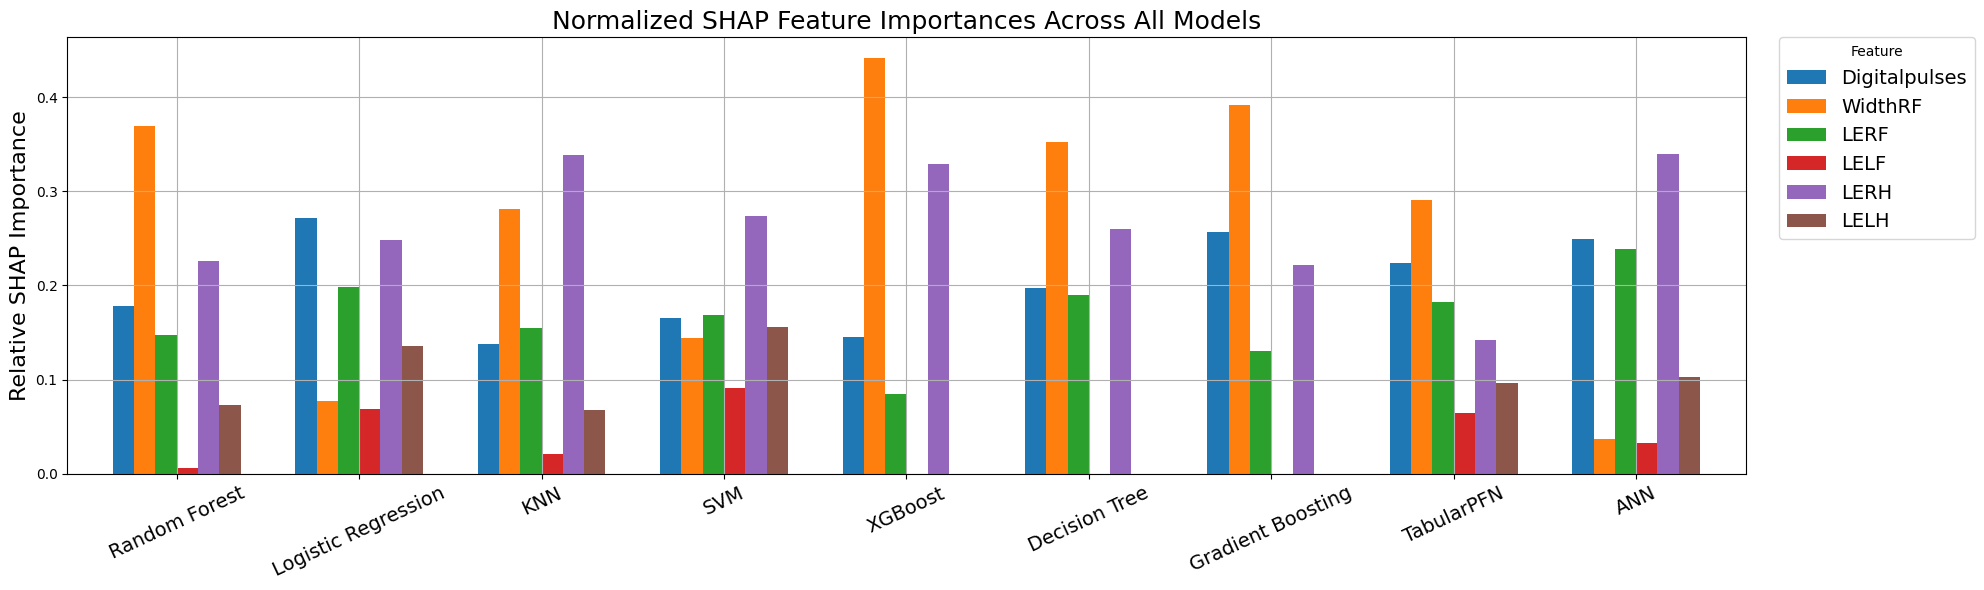


✅ Normalized global SHAP summary saved: explainability/global_shap_summary_normalized.png


In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import load_model

# === Directory to save plots ===
os.makedirs("explainability", exist_ok=True)

# === Input: X_test_scaled and selected_features ===
X_shap = pd.DataFrame(X_test_scaled, columns=selected_features)

# === Store mean abs SHAP values per feature per model ===
global_shap_df = pd.DataFrame(index=selected_features)

print("\n📊 Computing SHAP global importances for all models...")

for name, model in models.items():
    try:
        print(f"🔍 {name}")

        # === Tree-based models ===
        if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier, XGBClassifier)):
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_shap)

            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap_vals = shap_values[1]
            elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
                shap_vals = shap_values[:, :, 1]
            else:
                shap_vals = shap_values

        # === Non-tree models using KernelExplainer ===
        elif hasattr(model, "predict_proba"):
            background = shap.sample(X_shap, 100, random_state=42)

            def model_fn(X_array):
                return model.predict_proba(X_array)[:, 1]

            explainer = shap.KernelExplainer(model_fn, background)
            shap_vals = explainer.shap_values(X_shap, nsamples=100)

        else:
            raise Exception("Unsupported model.")

        # === Compute mean absolute SHAP values ===
        shap_vals = np.abs(np.array(shap_vals))
        mean_shap = shap_vals.mean(axis=0)
        global_shap_df[name] = mean_shap

    except Exception as e:
        print(f"❌ Failed for {name}: {e}")

# === Add ANN model separately ===
try:
    print(f"🔍 ANN")
    # Load the saved ANN model
    ann_model = load_model(os.path.join("final_models", "RF_model.h5")) # Assuming 'RF_model.h5' is the ANN model file name

    background = shap.sample(X_shap, 100, random_state=42)

    def ann_model_fn(X_array):
        return ann_model.predict(X_array).ravel()

    explainer = shap.KernelExplainer(ann_model_fn, background)
    shap_vals_ann = explainer.shap_values(X_shap, nsamples=100)

    shap_vals_ann = np.abs(np.array(shap_vals_ann))
    mean_shap_ann = shap_vals_ann.mean(axis=0)
    global_shap_df["ANN"] = mean_shap_ann

except Exception as e:
    print(f"❌ Failed for ANN: {e}")

# === Normalize SHAP values per model (column-wise) ===
normalized_shap_df = global_shap_df.div(global_shap_df.sum(axis=0), axis=1)

# === Plotting normalized SHAP importances ===
fig, ax = plt.subplots(figsize=(25, 6))
normalized_shap_df.T.plot(kind="bar", ax=ax, width=0.7)


# === Custom legend position ===
ax.legend(
    title="Feature",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0, fontsize=14
)

plt.title("Normalized SHAP Feature Importances Across All Models", fontsize=18)
plt.ylabel("Relative SHAP Importance", fontsize=16)
# plt.xlabel("Model", fontsize=16)
plt.xticks(rotation=25, fontsize=14)
plt.grid(True)

# Make room for legend
plt.tight_layout(rect=[0, 0, 0.8, 1])

# === Save ===
plot_path = "explainability/global_shap_summary_normalized.png"
plt.savefig(plot_path, dpi=500)
plt.show()

print(f"\n✅ Normalized global SHAP summary saved: {plot_path}")

In [ ]:
import pickle

svm_model = models["Random Forest"]

save_dir = "saved_model"
os.makedirs(save_dir, exist_ok=True)

with open(os.path.join(save_dir, "RF_model.pkl"), "wb") as f:
    pickle.dump(svm_model, f)

with open(os.path.join(save_dir, "RF_scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

with open(os.path.join(save_dir, "RF_features.pkl"), "wb") as f:
    pickle.dump(selected_features, f)

print("✅ RF model, scaler, and selected features saved.")


✅ RF model, scaler, and selected features saved.


In [ ]:
# import shutil
# import os

# # This deletes everything in the root workspace (except /content itself)
# for item in os.listdir("/content"):
#     item_path = os.path.join("/content", item)
#     try:
#         if os.path.isfile(item_path) or os.path.islink(item_path):
#             os.remove(item_path)
#         elif os.path.isdir(item_path):
#             shutil.rmtree(item_path)
#     except Exception as e:
#         print(f"Failed to delete {item_path}. Reason: {e}")

# print("✅ All files and folders in /content deleted.")


✅ All files and folders in /content deleted.


In [ ]:
# selected_feat = ['Digitalpulses','WidthRF','LERF', 'LELF', 'LERH', 'LELH']
# df[selected_feat]

In [ ]:
selected_feat = ['Respiratoryrate', 'Rectaltemperature', 'Digitalpulses', 'LLRF', 'LLLH', 'HTLH', 'LERF', 'LELF', 'LERH', 'LELH','lameness_risk_label']
df[selected_feat].to_excel('Dataset.xlsx', index=False)